![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


##Punto 1 - Análisis descriptivo
Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### **Análisis descriptivo de season y hour**

Las variables Estación del clima y hora nos puede ayudar a identificar patrones en la **demanda de renta de bicicletas** en diferentes momentos del día o en la estación del clima

### *Variable 'season':*
**1-** Se agrupan los datos por estación del clima y luego calcula la **media del total de viajes rentados en bicicleta en estación del clima**, donde 1:invierno, 2:primavera, 3:verano, 4 :fall.

Para cada estación del clima se calcula el promedio de la cantidad total de viajes rentados en bicicleta que se realizaron durante esa estación.

Las dos estaciones que tienen mayor promedio son:
 - Primavera con 215 viajes rentados en bicicleta en promedio
 - Verano con 234 viajes rentados en bicicleta en promedio

La estación que tuvo menor promedio fue el invierno con 116 viajes rentados en bicicleta en promedio

**2-** El **valor máximo** es de 977 viajes rentados en bicicletas y lo tiene la  estación del clima Verano

**3-** El **valor mínimo** es de 801 viajes rentados en bicicletas y lo tiene la  estación del clima Invierno

**4-** **Percentiles**:
Verificando el estación de clima de mayor demanda que es el Verano:
- El 25% inferior de las observaciones tienen un total de viajes en bicicleta alquiladas igual o inferior a este 68 viajes
- El 50% de las observaciones tienen un total de viajes en bicicleta alquiladas igual o inferior a 195 viajes
-El tercer cuartil o percentil 75% (Q3) indica que el 75% de los datos están por debajo de este valor y el 25% restante están por encima. es decir, el 25% superior de las observaciones tienen un total de viajes en bicicleta alquiladas igual o superior a 347 viajes

**5-** **Desviación standar**
La **variabilidad menor** de los viajes rentados totales en bicicleta la tiene la estación invierno con 125, es decir los valores de "total" están más cercanos a la media

La **variabilidad mayor** de los viajes totales rentados en bicicleta la tiene la estación verano, es decir los valores de "total" están mas dispersos a la media

**6-** **Histograma de frecuencia**:
El histogramanos muestra graficamente que las 4 estaciones manejan similar concentración de frecuencias en los viajes rentados en bicicleta, entendiendo que la frecuencia es cuántas veces ocurre un valor en un conjunto de datos

In [6]:
# Análisis variable 'sesion' agrupada
bikes.groupby('season').total.describe()



,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


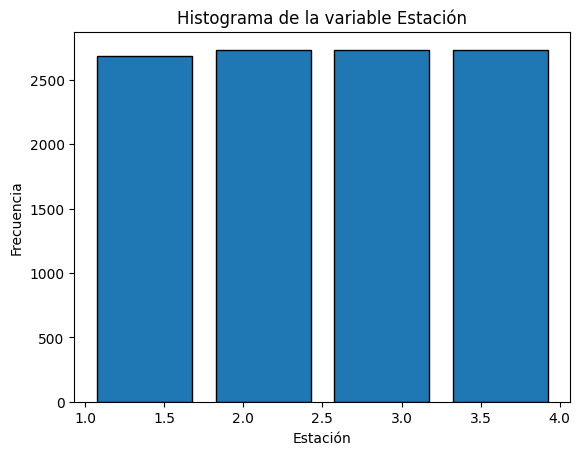

In [8]:
#Histograma de frecuencias
import matplotlib.pyplot as plt
# Crea un histograma de la variable hour
plt.hist(bikes['season'],  bins=4, rwidth=0.8, edgecolor='black')

# Agrega etiquetas y título al gráfico
plt.xlabel('Estación')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable Estación')

# Muestra el gráfico
plt.show()

### *Variable 'hora'*:
**1-** Se agrupan los datos por hora para cada hora del día (0- 24), se calcula el **promedio de la cantidad total de viajes rentados en bicicleta** que se realizaron durante esa hora

Para cada hora se calcula el promedio de la cantidad total de viajes rentados  en bicicleta que se realizaron durante esa hora.

Las horas que tienen mayor promedio son:
 - La hora 17 con 468 viajes rentados en bicicleta en promedio
 - La hora 18 con 430 viajes renatdos en bicicleta en promedio
 - La hora 8 am con 362 viajes rentados en bicicleta en promedio

Coincide con las salidas y entradas en los horarios de oficina

La horas con menor promedio están entre las 3 am y las 5 am con 11, 6 y 19 viajes rentados en bicicleta en promedio

**2-** El **valor máximo** de viajes renatdos en bicicletas por hora lo tiene la hora 18 con 977 viajes, seguido de la hora 17 con 970 viajes y la hora 8 am con 839 viajes
Concuerda con el mismo parámetro anterior con las salidas y entradas en los horarios de oficina

**3-** El **valor mínimo** de viajes rentados en bicicletas por hora lo tiene la franja horaria de 1 am a 7 am con 1 viaje

**4-** **Percentiles**:
Verificando el horario de mayor demanda que son las 18 horas:
- El 25% inferior de las observaciones tienen un total de viajes en bicicleta alquiladas igual o inferior a este 240 viajes
- El 50% de las observaciones tienen un total de viajes en bicicleta alquiladas igual o inferior a 422 viajes
-El tercer cuartil o percentil 75% (Q3) indica que el 75% de los datos están por debajo de este valor y el 25% restante están por encima. es decir, el 25% superior de las observaciones tienen un total de viajes en bicicleta alquiladas igual o superior a 564 viajes

**5-** **Desviación standar**

La **variabilidad menor** de los viajes rentados totales en bicicleta la hora 4 am  con 4, es decir los valores de "total" están más cercanos a la media

La **variabilidad mayor** de los viajes rentados totales en bicicleta la tiene la hora 8 am, es decir los valores de "total" están mas dispersos a la media


**6-** **Histograma de frecuencia**:
El histogramanos muestra graficamente que existe concentración de frecuencias en algunas horas del día como son 8 am, la hora 15  y la hora 21 y 0 , entendiendo que la frecuencia es cuántas veces ocurre un valor en un conjunto de datos

In [9]:
# Análisis variable 'hour' agrupada
bikes.groupby('hour').total.describe()


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


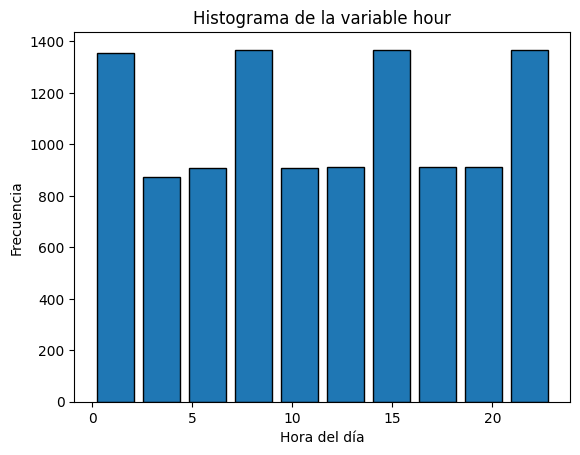

In [10]:
#Histograma de frecuencias
import matplotlib.pyplot as plt
# Crea un histograma de la variable hour
plt.hist(bikes['hour'], rwidth=0.8, edgecolor='black')

# Agrega etiquetas y título al gráfico
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable hour')


# Muestra el gráfico
plt.show()

## Punto 2 - Análisis de gráficos
Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

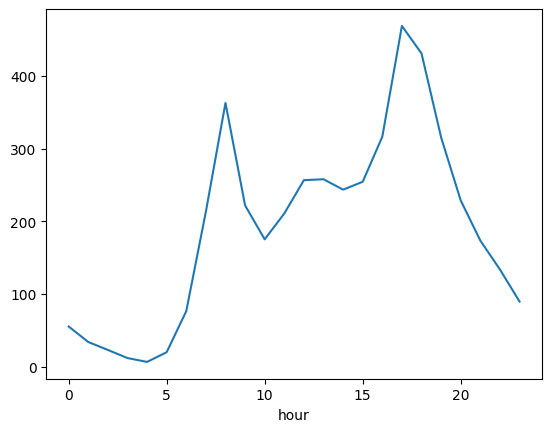

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

##Observaciones gráfica rentas promedio para cada valor de la variable "hour"
- La gráfica anterior nos muestra el  promedio de bicicletas rentadas para cada hora del día en una gráfica de línea. Nos permite visualizar cómo varía el número promedio de bicicletas rentadas a lo largo del día y los picos en las horas, sobre la 8 am se logra visualizar un promedio de 350 bicicletas rentadas y en el segundo pico que es sobre las 5 y 6 pm un promedio de 450 bicicletas rentadas 

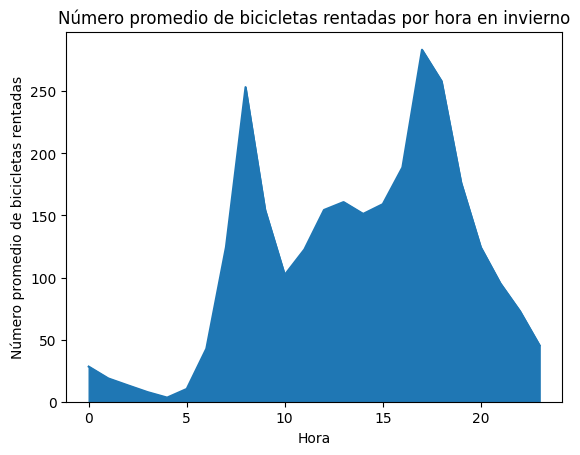

In [13]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtra los datos para incluir solo la estación 1 (invierno)
bikes_invierno = bikes[bikes.season == 1]

# Agrupa los datos por hora y calcula la media del número de bicicletas rentadas para cada hora
bikes_invierno_grouped = bikes_invierno.groupby('hour').total.mean()

# Crea una gráfica de área con los datos agrupados
bikes_invierno_grouped.plot(kind='area')

# Agrega un título y etiquetas de los ejes
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas rentadas')

# Muestra la gráfica
plt.show()

## Observaciones gráfica Número promedio de bicicletas rentadas por hora en invierno
La gráfica muestra el promedio de bicicletas rentadas por hora en invierno, se puede observar que existen 2 picos sobre las 8 am y sobre las 5 y 6 de la tarde, horas donde es posible que se renten más bicicletas por ser ingreso y salida de oficinas 

Sobre la 8 am se logra visualizar un promedio de 250 bicicletas rentadas y en el segundo pico que es sobre las 5 y 6 pm un promedio de 284 bicicletas rentadas

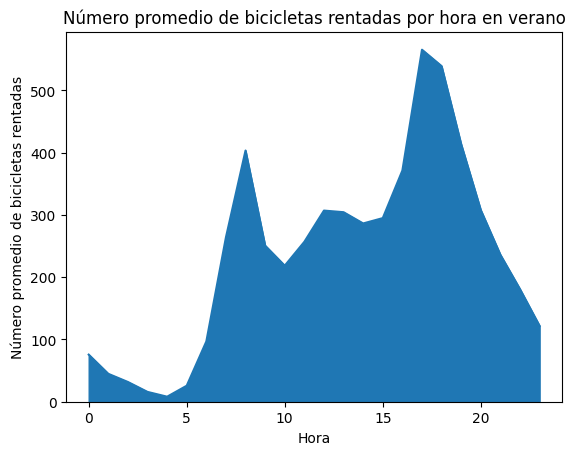

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtra los datos para incluir solo la estación 3 (verano)
bikes_invierno = bikes[bikes.season == 3]

# Agrupa los datos por hora y calcula la media del número de bicicletas rentadas para cada hora
bikes_invierno_grouped = bikes_invierno.groupby('hour').total.mean()

# Crea una gráfica de área con los datos agrupados
bikes_invierno_grouped.plot(kind='area')

# Agrega un título y etiquetas de los ejes
plt.title('Número promedio de bicicletas rentadas por hora en verano')
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas rentadas')

# Muestra la gráfica
plt.show()


## Observaciones gráfica Número promedio de bicicletas rentadas por hora en verano
La gráfica muestra el promedio de bicicletas rentadas por hora en verano, se puede observar que existen 2 picos sobre las 8 am y sobre las 5 y 6 de la tarde, horas donde es posible que se renten más bicicletas por ser ingreso y salida de oficinas 

Sobre la 8 am se logra visualizar un promedio de 400 bicicletas rentadas y en el segundo pico que es sobre las 5 y 6 pm un promedio de 550 bicicletas rentadas

## Conclusiones
- Existen los 2 mismo picos en horario que son las 8 am y entre las 5 y 6 pm en la estación Invierno y Verano

- En Verano se alquilan más bicicletas que en Invierno

## Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [16]:
# Celda 3

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#variables independientes
X = bikes[['season', 'hour']]
#variable dependiente o a predecir
y = bikes['total']

#separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear modelo de regresión lineal
model = LinearRegression().fit(X_train, y_train)

#predicción en prueba
y_pred = model.predict(X_test)

print('Intercepto:', model.intercept_)
print('Coeficientes:', model.coef_)


Intercepto: 2.1473084972573417
Coeficientes: [26.93974052 10.5544872 ]


## Observaciones

**Coeficientes**

Variable Estaciones del clima
1:invierno, 2:primavera, 3:verano, 4 :fall.

- El valor del intercepto del modelo, es decir el valor de la variable "total" cuando las variables predictoras "season" y "hour" son iguales a cero, se espera que el número total de bicicletas alquiladas sea de aproximadamente 2.147

- El coeficiente para la variable "season" indica que, manteniendo la hora constante, se espera que el número total de bicicletas alquiladas aumente en aproximadamente 26.9 unidades, cuando se pasa de la temporada de invierno (valor de 1) a cualquier otra temporada

- El coeficiente para la variable "hour" nos dice, manteniendo la temporada constante, se espera que el número total de bicicletas alquiladas aumente en aproximadamente 10.5 unidades por cada hora adicional. Esto significa que se espera que haya más alquileres de bicicletas durante las horas pico del día

**¿Cuáles son las limitaciones de la regresión lineal en este caso?**

- La regresión lineal puede verse afectada por la presencia de valores atípicos que no se analizaron, la falta de normalidad en los residuos ya que no se realiza escalamiento y la multicolinealidad entre las variables predictoras ya que no se revisa si hay multicolinealidad entre estación y hora. Es importante validar los supuestos y limitaciones de la regresión lineal antes de utilizarla para tomar decisiones importantes.

- También se asume una relación lineal entre las variables predictoras y la variable a predecir, lo cual podría no ser el caso en todos los escenarios

- La regresión lineal no tiene en cuenta la posible interacción entre las variables predictoras, como el efecto que la temporada y la hora juntas pueden tener en el número total de bicicletas alquiladas.




##Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando manualmente sobre las variables "hour" y "season". El árbol debe tener al menos 6 nodos finales.

In [24]:
# Celda 4
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#variables independientes
X = bikes[['season', 'hour']]
#variable dependiente o a predecir
y = bikes['total']

#separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#La clase DecisionNode se utiliza para representar cada nodo en el árbol de decisión
class DecisionNode:
    def __init__(self, feature=None, threshold=None, value=None, left_branch=None, right_branch=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left_branch = left_branch
        self.right_branch = right_branch



#Calcular la entropía para cada nodo del árbol, (La entropía es una medida de la impureza de un conjunto de datos)
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy += -prob * np.log2(prob)
    return entropy



#Función permitirá dividir los datos en función de una característica específica (la estación o la hora del día)
def split_data(X, y, feature, threshold):
    left_indices = X[:, feature] < threshold
    right_indices = ~left_indices
    X_left = X[left_indices]
    X_right = X[right_indices]
    y_left = y[left_indices]
    y_right = y[right_indices]
    return X_left, X_right, y_left, y_right

#función principal para construir el árbol de decisión
def build_tree(X, y, depth=0, max_depth=5):
    num_samples, num_features = X.shape
    best_feature, best_threshold, best_gain = None, None, 0
    for feature in range(num_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_X, right_X, left_y, right_y = split_data(X, y, feature, threshold)
            if len(left_y) > 0 and len(right_y) > 0:
                gain = entropy(y) - (len(left_y) / num_samples) * entropy(left_y) - (len(right_y) / num_samples) * entropy(right_y)
                if gain > best_gain:
                    best_feature = feature
                    best_threshold = threshold
                    best_gain = gain
    if best_gain > 0 and depth < max_depth:
        left_X, right_X, left_y, right_y = split_data(X, y, best_feature, best_threshold)
        print(f"At depth {depth}, we split on feature {best_feature} with gain {best_gain:.2f} and threshold {best_threshold:.2f}")
        left_branch = build_tree(left_X, left_y, depth+1, max_depth)
        right_branch = build_tree(right_X, right_y, depth+1, max_depth)
        return DecisionNode(feature=best_feature, threshold=best_threshold, left_branch=left_branch, right_branch=right_branch)
    else:
        leaf_value = np.mean(y)
        print(f"At depth {depth}, we have a leaf node with value {leaf_value:.2f}")
        return DecisionNode(value=leaf_value)

#profundidad de 6 nodos
tree = build_tree(X_train.to_numpy(), y_train.to_numpy(), max_depth=6)

#La función predict toma como entrada un conjunto de datos de prueba X_test y devuelve una lista de predicciones para cada elemento en X_test
def predict(node, x):
    if node.value is not None:
        return node.value
    feature_value = x[node.feature]
    if feature_value <= node.threshold:
        return predict(node.left_branch, x)
    else:
        return predict(node.right_branch, x)

y_pred = []
for x in X_test.to_numpy():
    y_pred.append(predict(tree, x))

#print(y_pred)

#Métricas

#MAE (error absoluto medio): Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos
mae = mean_absolute_error(y_test, y_pred)
print('\nMAE (Mean Absolute Error)')
print('MAE:', mae)

#MSE (error cuadrático medio): mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima
mse = mean_squared_error(y_test, y_pred)
print('\nMSE (Mean Squared Error)')
print('MSE:', mse)

#RMSE (raiz del error cuadrático medio): representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado
rmse = np.sqrt(mse)
print('\nRMSE (Root Mean Squared Error)')
print('RMSE:', rmse)

# calcular el R cuadrado 
#Un R cuadrado cercano a 1 indica un buen ajuste del modelo a los datos, mientras que un R cuadrado cercano a 0 indica un ajuste pobre del modelo a los datos
r2_score = r2_score(y_test, y_pred)
print("\nR cuadrado: ", r2_score)





At depth 0, we split on feature 1 with gain 0.53 and threshold 7.00
At depth 1, we split on feature 1 with gain 0.19 and threshold 6.00
At depth 2, we split on feature 1 with gain 0.23 and threshold 2.00
At depth 3, we split on feature 1 with gain 0.29 and threshold 1.00
At depth 4, we split on feature 0 with gain 0.36 and threshold 2.00
At depth 5, we have a leaf node with value 30.38
At depth 5, we split on feature 0 with gain 0.33 and threshold 3.00
At depth 6, we have a leaf node with value 56.32
At depth 6, we have a leaf node with value 64.81
At depth 4, we split on feature 0 with gain 0.37 and threshold 2.00
At depth 5, we have a leaf node with value 18.06
At depth 5, we split on feature 0 with gain 0.29 and threshold 3.00
At depth 6, we have a leaf node with value 33.19
At depth 6, we have a leaf node with value 39.20
At depth 3, we split on feature 1 with gain 0.18 and threshold 5.00
At depth 4, we split on feature 1 with gain 0.17 and threshold 3.00
At depth 5, we split on fe

## Observaciones modelo de regresión árbol de decisión manual

MAE (Mean Absolute Error): El valor de MAE es 100.41, lo que significa que, en promedio, el modelo está desviándose en 100.41 unidades de la variable objetivo

MSE (Mean Squared Error):  El valor de MSE es 22692.98, lo que significa que el modelo está cometiendo errores grandes en algunas de las predicciones

RMSE (Root Mean Squared Error): El valor de RMSE es 150.64, lo que indica que el modelo se desvía en promedio en 150.64 unidades de la variable objetivo

R cuadrado (R2): Coeficiente de determinación, es una medida de qué tan bien el modelo se ajusta a los datos. Toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y 0 indica que el modelo no está explicando nada de la variabilidad en los datos. En este caso, el valor de R2 es 0.31, lo que significa que el modelo no está ajustando muy bien los datos y hay una cantidad significativa de variabilidad que no se está explicando


##Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la librería sklearn, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [28]:
# Celda 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score



#variables independientes
X = bikes[['hour', 'season']]
#variable dependiente o a predecir
y = bikes['total']

#separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo de arbol de decisión
model = DecisionTreeRegressor(max_leaf_nodes=10,max_depth= 6,random_state=42)

#ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

#predicción en prueba
y_pred = model.predict(X_test)


#Métricas

#MAE (error absoluto medio): Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos
mae = mean_absolute_error(y_test, y_pred)
print('\nMAE (Mean Absolute Error)')
print('MAE:', mae)

#MSE (error cuadrático medio): mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima
mse = mean_squared_error(y_test, y_pred)
print('\nMSE (Mean Squared Error)')
print('MSE:', mse)

#RMSE (raiz del error cuadrático medio): representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado
rmse = np.sqrt(mse)
print('\nRMSE (Root Mean Squared Error)')
print('RMSE:', rmse)

# calcular el R cuadrado 
#Un R cuadrado cercano a 1 indica un buen ajuste del modelo a los datos, mientras que un R cuadrado cercano a 0 indica un ajuste pobre del modelo a los datos
r2_score_value = r2_score(y_test, y_pred)
print("\nR cuadrado: ", r2_score_value)


MAE (Mean Absolute Error)
MAE: 85.17395178825319

MSE (Mean Squared Error)
MSE: 14747.001596151958

RMSE (Root Mean Squared Error)
RMSE: 121.43723315421822

R cuadrado:  0.5532150679950543


## Observaciones modelo de regresión árbol de decisión con sklearn

- En este caso, el MAE es de 85.17, lo cual indica que en promedio, las predicciones del modelo tienen un error absoluto medio de 85.17 unidades respecto al valor real

- El MSE es de 14747.00, lo que significa que en promedio, el modelo tiene un error cuadrático medio de 14747.00 unidades respecto al valor real

- El RMSE es de 121.44, lo que indica que en promedio, el modelo tiene un error de 121.44 unidades respecto al valor real.

- El R cuadrado es de 0.55, lo que indica que el modelo explica el 55% de la variabilidad de los datos. Un R cuadrado mayor a 0.5 generalmente se considera un buen ajuste del modelo, pero aún existe una cantidad significativa de variabilidad que no se explica en el modelo

## Conclusiones entre la comparación de modelo árbol manual y árbol con librería

- En comparación, el segundo modelo que es el de árbol de decisión con sklearn presenta valores más bajos para todas las métricas (MAE, MSE y RMSE), lo que indica que tiene un mejor desempeño en la predicción de los datos. Además, el R cuadrado del segundo modelo es 0.553, lo que indica que explica mejor la variabilidad de los datos que el primer modelo con un R cuadrado de 0.312

- En general, se busca que las métricas de error (MAE, MSE, RMSE) sean lo más cercanas a cero posible, y que el R cuadrado sea cercano a 1. Por lo tanto, el segundo modelo presenta un mejor desempeño en la predicción de los datos que el primer modelo

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: datos.

### Datos popularidad de noticias

In [29]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [30]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [31]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

##Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [32]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# árbol de decisión
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# regresión logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)



# predicción árbol de decisión
y_pred_tree = tree.predict(X_test)

#Métricas árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)


# predicción regresión logística
y_pred_logreg = logreg.predict(X_test)

#Métricas árbol de decisión
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Accuracy del árbol de decisión: {accuracy_tree:.2f}")
print(f"F1-Score del árbol de decisión: {f1_tree:.2f}")

print(f"\nAccuracy de la regresión logística: {accuracy_logreg:.2f}")
print(f"F1-Score de la regresión logística: {f1_logreg:.2f}")

Accuracy del árbol de decisión: 0.64
F1-Score del árbol de decisión: 0.66

Accuracy de la regresión logística: 0.61
F1-Score de la regresión logística: 0.61


## Observaciones:

- En el árbol de decisión, la precisión es del 64% y el F1-Score es del 66%. El modelo clasifica correctamente el 64% de las observaciones y logra un equilibrio entre la precisión y el recall del 66%. Esto es importante si el objetivo es identificar correctamente todas las clases relevantes

- En  la regresión logística, la precisión es del 61% y el F1-Score es del 61%. El modelo clasifica correctamente el 61% de las observaciones y logra un equilibrio entre la precisión y el recall del 61%.

En **conslusión** el árbol de decisión tiene un rendimiento ligeramente mejor que la regresión logística en términos de precisión (accuracy) y F1-score. La precisión del árbol de decisión es del 64%, mientras que la regresión logística tiene una precisión del 61%. El F1-score del árbol de decisión es del 0.66, mientras que la regresión logística tiene un F1-score de 0.61

##Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de Votación mayoritaria compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

In [33]:
# Celda 7

from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Crear 100 clasificadores con árboles de decisión con max_depth=5
tree1 = [DecisionTreeClassifier(max_depth=5) for _ in range(100)]
# Crear 100 clasificadores con árboles de decisión con min_samples_leaf=5
tree2 = [DecisionTreeClassifier(min_samples_leaf=5) for _ in range(100)]
# Crear 100 clasificadores de regresión logística
logreg = [LogisticRegression() for _ in range(100)]

# Entrenar los modelos individualmente
for t in tree1:
    t.fit(X_train, y_train)
for t in tree2:
    t.fit(X_train, y_train)
for l in logreg:
    l.fit(X_train, y_train)

# Evaluar los modelos individualmente
tree1_acc = np.mean([t.score(X_test, y_test) for t in tree1])
tree1_f1 = np.mean([f1_score(y_test, t.predict(X_test)) for t in tree1])
tree2_acc = np.mean([t.score(X_test, y_test) for t in tree2])
tree2_f1 = np.mean([f1_score(y_test, t.predict(X_test)) for t in tree2])
logreg_acc = np.mean([l.score(X_test, y_test) for l in logreg])
logreg_f1 = np.mean([f1_score(y_test, l.predict(X_test)) for l in logreg])

#Métricas individuales
print(f"Accuracy para árboles de decisión (max_depth=5): {tree1_acc}")
print(f"F1-Score para árboles de decisión (max_depth=5): {tree1_f1}")
print(f"\nAccuracy para árboles de decisión (min_samples_leaf=5): {tree2_acc}")
print(f"F1-Score para árboles de decisión (min_samples_leaf=5): {tree2_f1}")
print(f"\nAccuracy para regresión logística: {logreg_acc}")
print(f"F1-Score para regresión logística: {logreg_f1}")

# Crear ensamble de votación mayoritaria
#La votación 'hard' toma la decisión de clase que tiene más votos
#300 muestras
ensemble = VotingClassifier(estimators=[
    ('tree1', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=300)),
    ('tree2', BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), n_estimators=300)),
    ('logreg', BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=300))
], voting='hard', n_jobs=-1)

#Entrenamos el modelo
ensemble.fit(X_train, y_train)

#Métricas del modeo ensamblaje
ensemble_acc = ensemble.score(X_test, y_test)
ensemble_f1 = f1_score(y_test, ensemble.predict(X_test))
print(f"\nAccuracy para ensamble de votación mayoritaria: {ensemble_acc}")
print(f"F1-Score para ensamble de votación mayoritaria: {ensemble_f1}")


Accuracy para árboles de decisión (max_depth=5): 0.6384799999999999
F1-Score para árboles de decisión (max_depth=5): 0.6624010868351508

Accuracy para árboles de decisión (min_samples_leaf=5): 0.5403933333333333
F1-Score para árboles de decisión (min_samples_leaf=5): 0.5450031412002955

Accuracy para regresión logística: 0.6133333333333332
F1-Score para regresión logística: 0.6102150537634409

Accuracy para ensamble de votación mayoritaria: 0.6613333333333333
F1-Score para ensamble de votación mayoritaria: 0.6626826029216467


## Observaciones:

- El ensamble de votación mayoritaria presenta la mayor precisión (accuracy) con un valor de 0.6613, seguido por el árbol de decisión con profundidad máxima de 5 con un valor de 0.6384, la regresión logística presenta una precisión menor con un valor de 0.6133 y el árbol de decisión con un mínimo de muestras por hoja de 5 presenta la menor precisión con un valor de 0.5403

- Con la métrica F1-Score, se puede observar que el ensamble de votación mayoritaria presenta el mejor resultado con un valor de 0.6627, seguido por el árbol de decisión con profundidad máxima de 5 con un valor de 0.6624, la regresión logística presenta un F1-Score de 0.6102 y el árbol de decisión con un mínimo de muestras por hoja de 5 presenta el peor resultado con un valor de 0.5450.

- En conclusión, el ensamble de votación mayoritaria es el modelo más efectivo en términos de precisión y F1-Score, seguido por el árbol de decisión con profundidad máxima de 5

##Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de Votación ponderada compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


#Escenarios del punto 7
# Crear 100 clasificadores con árboles de decisión con max_depth=3
tree_clfs = [DecisionTreeClassifier(max_depth=3) for _ in range(100)]

# Crear 100 clasificadores con árboles de decisión con min_samples_leaf=10
tree_clfs2 = [DecisionTreeClassifier(min_samples_leaf=5) for _ in range(100)]

# Crear 100 clasificadores con regresión logística
log_clfs = [LogisticRegression() for _ in range(100)]

# Crear BaggingClassifier para cada tipo de clasificador
#300 muestras
tree_bag = BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=300)
tree2_bag = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5), n_estimators=300)
log_bag = BaggingClassifier(LogisticRegression(), n_estimators=300)

# Crear ensamble de votación ponderada con los BaggingClassifiers creados anteriormente
#la votación ponderada, se usa el parámetro "weights" de VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('tree', tree_bag),
    ('tree2', tree2_bag),
    ('log', log_bag)],
    voting='soft', weights=[1, 1, 1])

# Entrenar el ensamble
voting_clf.fit(X_train, y_train)

# Evaluar el desempeño del ensamble
y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", acc)
print("F1-Score:", f1)


Accuracy: 0.6586666666666666
F1-Score: 0.6586715213232731


##Observaciones 

- El modelo de votación ponderada tiene un Accuracy y F1-Score promedio del 65.8%.

- El Accuracy es una medida de la proporción de predicciones correctas en comparación con el total de predicciones realizadas. El un Accuracy del 65.8% indica que aproximadamente el 65.8% de las predicciones realizadas por el modelo fueron correctas.

- El F1-Score es una medida que combina la precisión y la exhaustividad del modelo en una sola métrica. Un valor de F1-Score del 65.8% indica que el modelo tiene un equilibrio similar entre la precisión y la exhaustividad en sus predicciones

En conclusión, el modelo de votación ponderada parece ser capaz de realizar predicciones con una precisión y exhaustividad promedio del 65.8%

##Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.**texto en negrita**

## Observaciones

- El modelo de ensamble de **votación mayoritaria** tiene un Accuracy de 0.6613 y un F1-Score de 0.6627, lo que indica que el ensamble de votación mayoritaria tiene un rendimiento ligeramente mejor que el modelo de votación ponderada, aunque la mejora no es muy significativa

**Ventajas y Desventajas**
- El modelo de **votación ponderada** es más útil cuando hay clasificadores con diferentes niveles de precisión, ya que asigna un peso diferente a cada clasificador según su rendimiento, es más dificl de ajustar

- El ensamble de **votación mayoritaria** es más simple de entender. Es útil cuando los clasificadores tienen un nivel de precisión similar, ya que simplemente cuenta las predicciones de cada clasificador y elige la clase más frecuente. Sin embargo, puede perder información sobre la probabilidad de las predicciones y puede ser menos preciso cuando los clasificadores tienen un nivel de precisión muy diferente.

- En conclusión, la elección de la técnica de ensamble dependerá de la naturaleza del problema y de las características de los clasificadores utilizados. Si los clasificadores tienen niveles de precisión similares, el ensamble de votación mayoritaria puede ser una buena opción debido a su simplicidad y facilidad de uso. Si los clasificadores tienen niveles de precisión muy diferentes, el modelo de votación ponderada puede ser más útil debido a su capacidad para asignar pesos diferentes a cada clasificador según su rendimiento